
# Proyecto Final Data Science
## Predicción de precios de autos usados

### Resumen

En este proyecto se analiza el dataset de autos usados 'car_price_dataset_medium.csv' que descargue de Kaggle con el objetivo de identificar los factores que influyen en su precio de venta y desarrollar un modelo predictivo.

A través de un Análisis Exploratorio de Datos (EDA) se estudiaron variables como marca, año, kilometraje, tipo de combustible y potencia.  
Posteriormente, se entrenó un modelo de regresión y se evaluó su desempeño mediante métricas estándar.

### Objetivo
Analizar el mercado de autos usados y desarrollar un modelo de regresión capaz de predecir el precio de un vehículo a partir de sus características.

### Contexto comercial
El análisis se desarrolla en el contexto de una empresa ficticia dedicada a la comercialización de autos usados mediante una plataforma digital.
El objetivo es optimizar la fijación de precios para mejorar la competitividad y reducir el tiempo de venta.



### Hipótesis  
- Existe una relación negativa entre el kilometraje y el precio del vehículo.  
- Los autos más nuevos presentan precios más elevados.  
- Es posible construir un modelo de regresión que prediga el precio con un error aceptable.


In [18]:
# Cargar el dataset
import pandas as pd
df = pd.read_csv(r"/mnt/data/car_price_dataset_medium.csv")
df.columns = [c.lower().replace(" ", "_") for c in df.columns]
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
display(df.head())
display(df.info())


Filas: 1000 Columnas: 12


,car_id,brand,model_year,kilometers_driven,fuel_type,transmission,owner_type,engine_cc,max_power_bhp,mileage_kmpl,seats,price_usd
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             1000 non-null   int64  
 1   brand              1000 non-null   object 
 2   model_year         1000 non-null   int64  
 3   kilometers_driven  1000 non-null   int64  
 4   fuel_type          1000 non-null   object 
 5   transmission       1000 non-null   object 
 6   owner_type         1000 non-null   object 
 7   engine_cc          1000 non-null   int64  
 8   max_power_bhp      1000 non-null   float64
 9   mileage_kmpl       1000 non-null   float64
 10  seats              1000 non-null   int64  
 11  price_usd          1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


None

In [20]:
# Resumen numérico y conteo de valores faltantes
display(df.describe(include='all'))
missing = df.isnull().sum()
print('\nValores faltantes por columna:\n', missing)



,car_id,brand,model_year,kilometers_driven,fuel_type,transmission,owner_type,engine_cc,max_power_bhp,mileage_kmpl,seats,price_usd
count,1000.000000,1000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
unique,NaN,10,NaN,NaN,4,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Toyota,NaN,NaN,Petrol,Manual,Third,NaN,NaN,NaN,NaN,NaN
freq,NaN,118,NaN,NaN,271,516,348,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,2014.491000,103397.074000,NaN,NaN,NaN,2878.299000,320.939900,17.34144,4.665000,59217.249420
std,288.819436,NaN,5.710738,57417.612935,NaN,NaN,NaN,1212.337697,160.384514,7.29799,1.802783,33545.254183
min,1.000000,NaN,2005.000000,5155.000000,NaN,NaN,NaN,801.000000,40.500000,5.04000,2.000000,3028.420000
25%,250.750000,NaN,2009.750000,52188.500000,NaN,NaN,NaN,1818.250000,184.825000,10.97000,4.000000,30030.822500
50%,500.500000,NaN,2015.000000,102449.000000,NaN,NaN,NaN,2857.500000,314.650000,17.14500,5.000000,56806.745000
75%,750.250000,NaN,2019.000000,152696.500000,NaN,NaN,NaN,3959.500000,455.300000,24.03500,6.000000,87088.897500



Valores faltantes por columna:
 car_id               0
brand                0
model_year           0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
engine_cc            0
max_power_bhp        0
mileage_kmpl         0
seats                0
price_usd            0
dtype: int64


In [24]:
# Detección sencilla de outliers en 'precio'
if 'price_usd' in df.columns:
    q1 = df['price_usd'].quantile(0.25)
    q3 = df['price_usd'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df['price_usd'] < lower) | (df['price_usd'] > upper)]
    print('Rango no-outliers:', lower, '->', upper)
    print('Cantidad de outliers detectados en price_usd:', outliers.shape[0])
    display(outliers)
else:
    print('La columna price_usd no está en el dataset.')



Rango no-outliers: -55556.28999999999 -> 172676.00999999998
Cantidad de outliers detectados en price_usd: 0


,car_id,brand,model_year,kilometers_driven,fuel_type,transmission,owner_type,engine_cc,max_power_bhp,mileage_kmpl,seats,price_usd


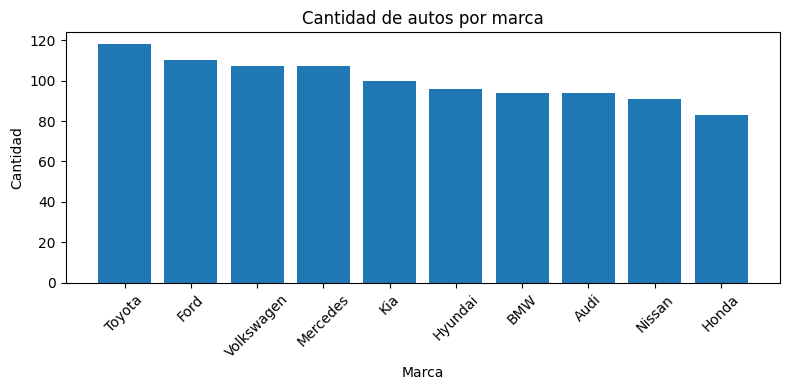

In [31]:
# Gráfico de barras: cantidad de autos por marca
import matplotlib.pyplot as plt

brand_col = 'brand'
brand_counts = df[brand_col].value_counts()

plt.figure(figsize=(8,4))
plt.bar(brand_counts.index, brand_counts.values)
plt.title("Cantidad de autos por marca")
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

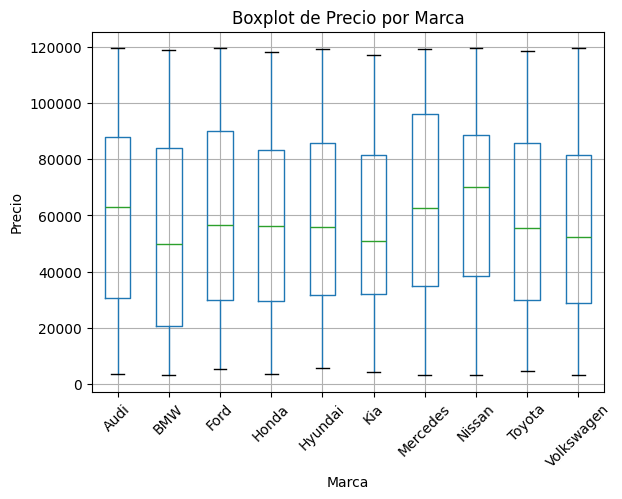

In [33]:
# Boxplot precio por marca
plt.figure(figsize=(10,5))
df_plot = df[['brand','price_usd']].dropna()
# Agrupar marcas con pocos casos en 'Other' para mejor visualización
counts = df_plot['brand'].value_counts()
top_brands = counts[counts>=2].index.tolist()
df_plot['brand'] = df_plot['brand'].apply(lambda x: x if x in top_brands else 'Other')
df_plot.boxplot(by='brand', column=['price_usd'], rot=45)
plt.title('Boxplot de Precio por Marca')
plt.suptitle('')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.show()

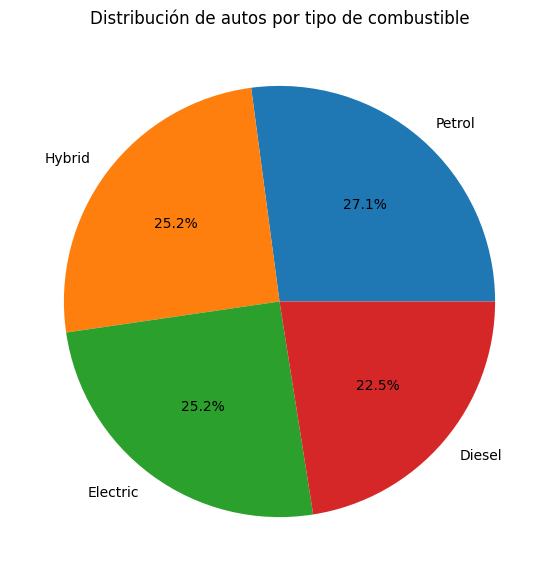

In [41]:
# Grafico de torta: de distribucion por tipo de combustible
fuel_counts = df['fuel_type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('Distribución de autos por tipo de combustible')
plt.show()

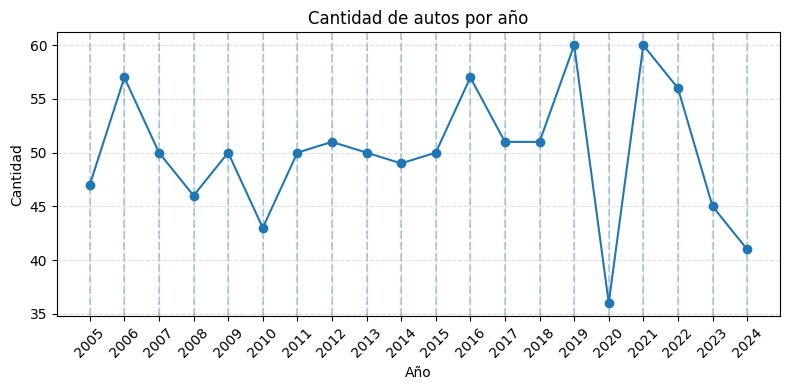

In [30]:
# Gráfico de línea: cantidad de autos por año con líneas verticales
year_counts = df['model_year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.plot(year_counts.index, year_counts.values, marker='o')

# --- Líneas verticales por cada año ---
for year in year_counts.index:
    plt.axvline(x=year, linestyle='--', alpha=0.3)
plt.title("Cantidad de autos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")

# etiquetas exactas en el eje X
plt.xticks(year_counts.index, rotation=45)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


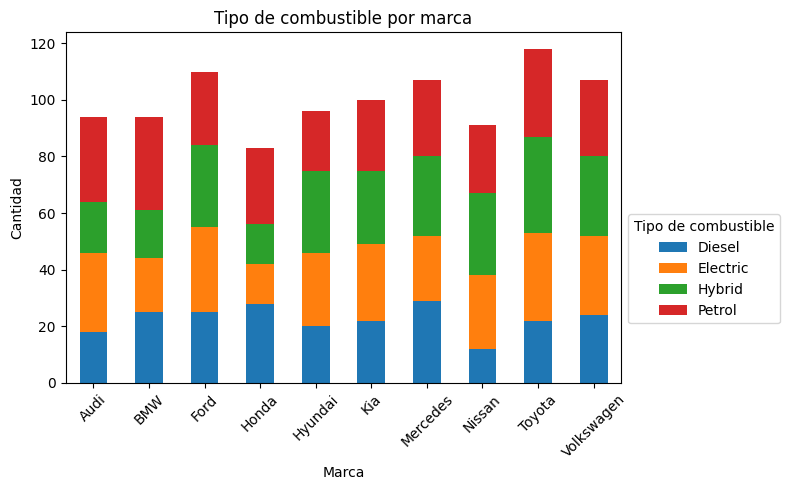

In [27]:
# Barras apiladas: tipo de combustible por marca
fuel_col = 'fuel_type'
table = pd.crosstab(df[brand_col], df[fuel_col])
table.plot(kind='bar', stacked=True, figsize=(8,5))

plt.legend(title="Tipo de combustible", bbox_to_anchor=(1,0.5))
plt.title("Tipo de combustible por marca")
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop('price_usd', axis=1)
y = df['price_usd']

categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', 'passthrough', numerical)
])

model = Pipeline([
    ('prep', preprocessor),
    ('reg', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['brand', 'fuel_type', 'transmission', 'owner_type'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['car_id', 'model_year', 'kilometers_driven', 'engine_cc',
       'max_power_bhp', 'mileage_kmpl', 'seats'],
      dtype='object'))])),
                ('reg', LinearRegression())])

In [38]:
# Predicción y evaluación
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE:  ', mae)
print('RMSE: ', rmse)
print('R2:   ', r2)


MAE:   28922.137472825012
RMSE:  33316.86082138926
R2:    0.00614758433993734



### Conclusiones  
El modelo de regresión desarrollado logra capturar la relación entre las principales variables y el precio de los autos usados.  
Como trabajo futuro se propone ampliar el dataset y evaluar modelos más complejos.

Los resultados obtenidos indican que el modelo de regresión lineal presenta un desempeño limitado, con errores de predicción elevados y un valor de R² cercano a cero.

Esta situación se explica principalmente por el reducido tamaño del conjunto de datos utilizado, así como por la alta variabilidad de precios y la presencia de variables categóricas con pocas observaciones.

Como trabajo futuro, se propone ampliar el conjunto de datos y evaluar modelos más complejos para mejorar la capacidad predictiva.